# TFM

Cargamos las librerias principales a usar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

Cargamos los datos desde un archivo .csv

In [80]:
datos_sample = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv")

In [81]:
datos_sample.shape

(880730, 20)

In [82]:
datos_sample.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,key
0,2,01/05/2018 03:38:29 PM,01/05/2018 03:38:34 PM,N,5,252,252,1,0.00,13.0,0.0,0.0,2.60,0.0,NaN,0.0,15.60,1,2.0,89971
1,2,09/27/2018 11:08:19 AM,09/27/2018 11:32:25 AM,N,1,198,226,5,4.24,18.0,0.0,0.5,0.00,0.0,NaN,0.3,18.80,1,1.0,6666930
2,1,02/01/2018 04:37:07 PM,02/01/2018 04:45:39 PM,N,1,65,97,1,0.90,7.0,1.0,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0,809804
3,2,03/16/2018 04:54:02 PM,03/16/2018 05:03:34 PM,N,1,95,135,1,1.87,9.0,1.0,0.5,2.16,0.0,NaN,0.3,12.96,1,1.0,1991769
4,1,01/26/2018 12:29:18 PM,01/26/2018 12:40:07 PM,N,1,74,166,1,1.50,8.5,0.0,0.5,0.00,0.0,NaN,0.3,9.30,1,1.0,641488


Limpiamos el campo inicio del viaje y el campo finalizacion del viaje, extrayendo el dia de semana, el dia, mes, hora, y el tiempo de duracion del viaje

In [83]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [84]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [85]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [86]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [87]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [88]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [89]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [90]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

Limpiamos las variables que tenemos:

**Target: time_duration**

In [91]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        220.417151
std        7522.986964
min      -86384.000000
25%         377.000000
50%         650.000000
75%        1117.000000
max       86163.000000
Name: time_duration, dtype: float64

In [92]:
percentile = pd.DataFrame(datos_sample["time_duration"].quantile([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["time_duration"]

0.000   -86384.0
0.050      146.0
0.100      222.0
0.200      328.0
0.300      426.0
0.400      530.0
0.500      650.0
0.600      797.0
0.700      990.0
0.800     1276.0
0.900     1817.0
0.975     3040.0
1.000    86163.0
Name: time_duration, dtype: float64

In [93]:
datos_sample = datos_sample[datos_sample["time_duration"] >= 240]
datos_sample = datos_sample[datos_sample["time_duration"] <= 3600]

finalmente nos quedamos con el intervalo desde 4 minutos hasta 1 hora y realizamos algunos graficos para ver la variable:

Text(0.5, 1.0, 'Tiempo Duracion')

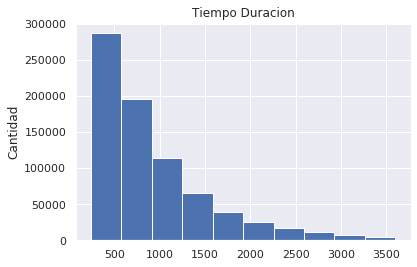

In [94]:
fig, ax = plt.subplots()

ax.hist(datos_sample["time_duration"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Tiempo Duracion')

[Text(0, 0, 'Tiempo Duracion')]

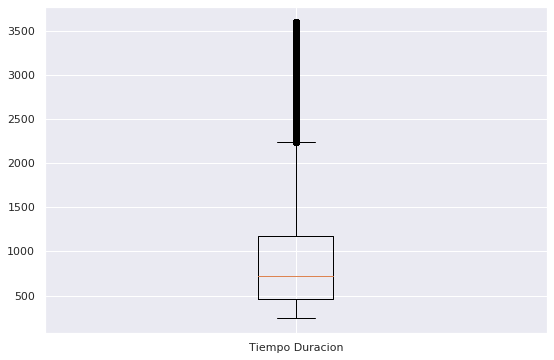

In [95]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["time_duration"])
ax.set_xticklabels(["Tiempo Duracion"])

**VendorID**

In [96]:
VendorID = datos_sample.groupby("VendorID")["key"].count().reset_index()
VendorID.columns = ["VendorID","Cantidad"]
VendorID["VendorID"] = VendorID["VendorID"].replace(1,"Tipo_1")
VendorID["VendorID"] = VendorID["VendorID"].replace(2,"Tipo_2")

Text(0.5, 1.0, 'Tipo VendorID')

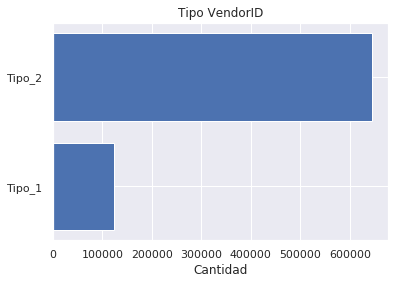

In [97]:
fig, ax = plt.subplots()

ax.barh(VendorID["VendorID"],VendorID["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Tipo VendorID')

**store_and_fwd_flag**

In [98]:
StoreFwdFlag = datos_sample.groupby("store_and_fwd_flag")["key"].count().reset_index()
StoreFwdFlag.columns = ["store_and_fwd_flag","Cantidad"]
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(0,"N")
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(1,"Y")

In [99]:
StoreFwdFlag

,store_and_fwd_flag,Cantidad
0,N,766551
1,Y,1361


Text(0.5, 1.0, 'Variable store_and_fwd_flag')

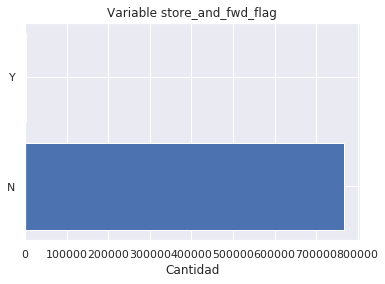

In [100]:
fig, ax = plt.subplots()

ax.barh(StoreFwdFlag["store_and_fwd_flag"],StoreFwdFlag["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Variable store_and_fwd_flag')

In [101]:
datos_sample = datos_sample[datos_sample["store_and_fwd_flag"] == "N"]

finalmente en esta variable nos quedamos con el nivel "N", ya que el otro nivel "Y" tiene muy pocos registros

**RatecodeID**

In [102]:
datos_sample = datos_sample[datos_sample["RatecodeID"] != 99]

In [103]:
RateCodeID = datos_sample.groupby("RatecodeID")["key"].count().reset_index()
RateCodeID.columns = ["RatecodeID","Cantidad"]
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(1,"Tasa Estandar")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(2,"JFK")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(3,"Newark")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(4,"Nassau o Westchester")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(5,"Tarifa Negociada")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(6,"Viaje Grupo")

In [104]:
RateCodeID

,RatecodeID,Cantidad
0,Tasa Estandar,747042
1,JFK,949
2,Newark,218
3,Nassau o Westchester,447
4,Tarifa Negociada,17894


Text(0.5, 1.0, 'RatecodeID')

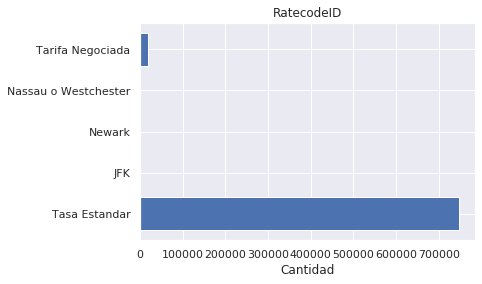

In [105]:
fig, ax = plt.subplots()

ax.barh(RateCodeID["RatecodeID"],RateCodeID["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('RatecodeID')

In [106]:
datos_sample = datos_sample[datos_sample["RatecodeID"] == 1]

finalmente en esta variable nos quedamos con el nivel "Tasa Estandar", ya que los demas niveles tienen muy poca informacion

**passenger_count**

In [107]:
Pasenger = datos_sample.groupby("passenger_count")["key"].count().reset_index()
Pasenger.columns = ["passenger_count","Cantidad"]

In [108]:
Pasenger

,passenger_count,Cantidad
0,0,952
1,1,631458
2,2,58407
3,3,12215
4,4,4348
5,5,25822
6,6,13840


Text(0.5, 1.0, 'Numero Pasajeros')

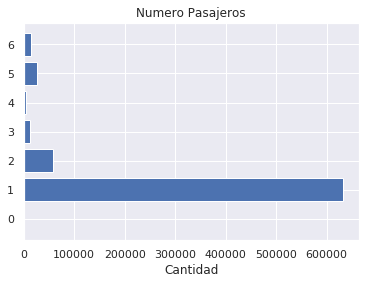

In [109]:
fig, ax = plt.subplots()

ax.barh(Pasenger["passenger_count"],Pasenger["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Numero Pasajeros')

In [110]:
datos_sample = datos_sample[datos_sample["passenger_count"] > 0]

Finalmente en esta variables nos quedamos con al menos un pasajero en el viaje 

**trip_distance**

In [111]:
datos_sample["trip_distance"].describe()

count    746090.000000
mean          3.153311
std           3.078857
min           0.000000
25%           1.230000
50%           2.080000
75%           3.830000
max         120.470000
Name: trip_distance, dtype: float64

In [112]:
percentile = pd.DataFrame(datos_sample["trip_distance"].quantile([0, 0.025, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["trip_distance"]

0.000      0.000
0.025      0.600
0.100      0.870
0.200      1.100
0.300      1.370
0.400      1.680
0.500      2.080
0.600      2.610
0.700      3.340
0.800      4.520
0.900      6.861
0.975     12.070
1.000    120.470
Name: trip_distance, dtype: float64

In [113]:
datos_sample = datos_sample[datos_sample["trip_distance"] >= 0.5]
datos_sample = datos_sample[datos_sample["trip_distance"] <= 12]

Finalmente en esta variable nos quedamos con el intervalo entre 500 metros hasta 12 kilometros y realizamos algunos graficos para ver la distribucion de la variable

Text(0.5, 1.0, 'Distancia')

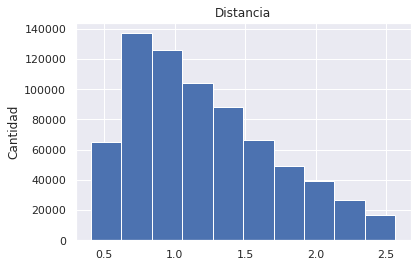

In [114]:
fig, ax = plt.subplots()

ax.hist(np.log1p(datos_sample["trip_distance"]))
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Distancia')

[Text(0, 0, 'Distancia')]

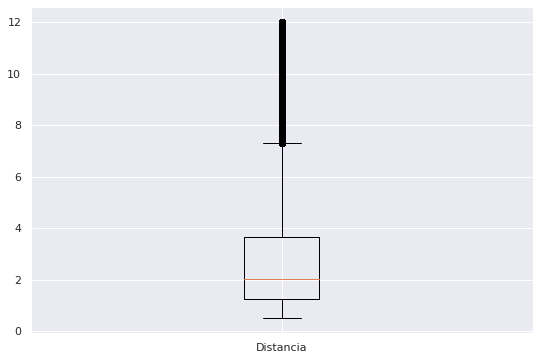

In [115]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["trip_distance"])
ax.set_xticklabels(["Distancia"])

**payment_type**

In [116]:
PaymentType = datos_sample.groupby("payment_type")["key"].count().reset_index()
PaymentType.columns = ["payment_type","Cantidad"]
PaymentType["payment_type"] = PaymentType["payment_type"].replace(1,"Tarjeta Credito")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(2,"Efectivo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(3,"Sin Cargo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(4,"Disputa")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(5,"Desconocido")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(6,"Viaje Vacio")

In [117]:
PaymentType

,payment_type,Cantidad
0,Tarjeta Credito,412294
1,Efectivo,304784
2,Sin Cargo,1403
3,Disputa,883
4,Desconocido,9


Text(0.5, 1.0, 'Tipo Pago')

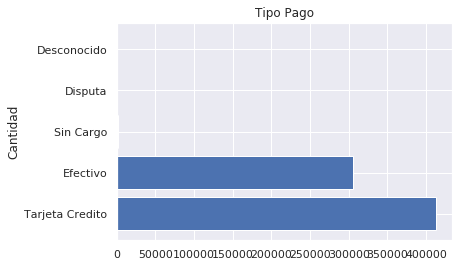

In [118]:
fig, ax = plt.subplots()

ax.barh(PaymentType["payment_type"],PaymentType["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Tipo Pago')

In [119]:
datos_sample = datos_sample[datos_sample["payment_type"] <= 2]

Finalmente en esta variable nos quedamos con los niveles "tarjeta Credito" y "Efectivo", ya que los otros niveles tienen muy poca informacion

**dayofweek**

In [120]:
DayofWeek = datos_sample.groupby("dayofweek")["key"].count().reset_index()
DayofWeek.columns = ["dayofweek","Cantidad"]
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(0,"Lunes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(1,"Martes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(2,"Miercoles")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(3,"Jueves")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(4,"Viernes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(5,"Sabado")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(6,"Domingo")

In [121]:
DayofWeek

,dayofweek,Cantidad
0,Lunes,93418
1,Martes,97017
2,Miercoles,99998
3,Jueves,103811
4,Viernes,113521
5,Sabado,114948
6,Domingo,94365


Text(0.5, 1.0, 'Dia Semana')

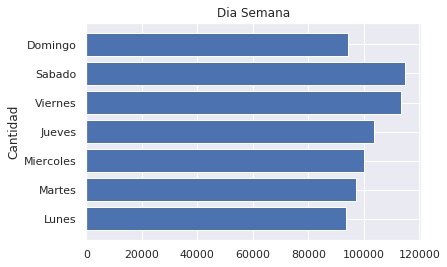

In [122]:
fig, ax = plt.subplots()

ax.barh(DayofWeek["dayofweek"],DayofWeek["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Dia Semana')

**dayofmonth**

In [123]:
DayofMonth = datos_sample.groupby("dayofmonth")["key"].count().reset_index()
DayofMonth.columns = ["dayofmonth","Cantidad"]

Text(0.5, 1.0, 'Dia Mes')

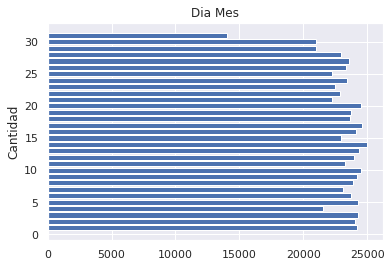

In [124]:
fig, ax = plt.subplots()

ax.barh(DayofMonth["dayofmonth"],DayofMonth["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Dia Mes')

**month**

In [125]:
Month = datos_sample.groupby("month")["key"].count().reset_index()
Month.columns = ["month","Cantidad"]

Text(0.5, 1.0, 'Mes')

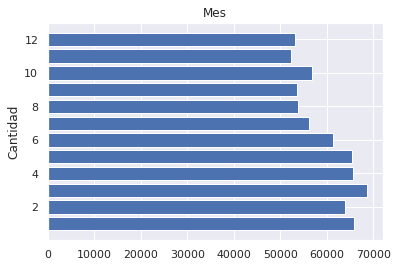

In [126]:
fig, ax = plt.subplots()

ax.barh(Month["month"],Month["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Mes')

**hora**

In [127]:
Hora = datos_sample.groupby("hora_pickup")["key"].count().reset_index()
Hora.columns = ["hora_pickup","Cantidad"]

Text(0.5, 1.0, 'Hora')

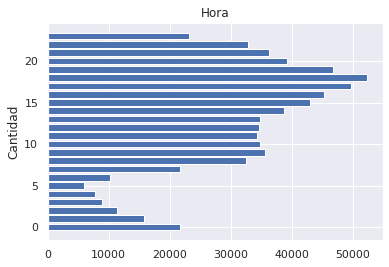

In [128]:
fig, ax = plt.subplots()

ax.barh(Hora["hora_pickup"],Hora["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Hora')

**total_amount**

In [129]:
datos_sample["total_amount"].describe()

count    717078.000000
mean         14.828153
std           8.083568
min           0.000000
25%           8.800000
50%          12.300000
75%          18.300000
max         232.300000
Name: total_amount, dtype: float64

In [130]:
percentile = pd.DataFrame(datos_sample["total_amount"].quantile([0, 0.025, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["total_amount"]

0.000      0.00
0.025      6.30
0.100      7.30
0.200      8.30
0.300      9.36
0.400     10.80
0.500     12.30
0.600     14.16
0.700     16.56
0.800     20.30
0.900     26.75
0.975     36.67
1.000    232.30
Name: total_amount, dtype: float64

In [131]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 5]
datos_sample = datos_sample[datos_sample["total_amount"] <= 40]

finalmente en esta variable nos quedamos con el intervalo entre 5 y 40 y realizamos algunos graficos para ver la distribucion de la variable

Text(0.5, 1.0, 'Pago Total')

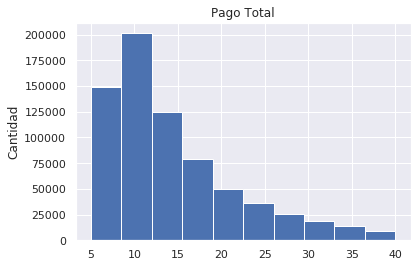

In [132]:
fig, ax = plt.subplots()

ax.hist(datos_sample["total_amount"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Pago Total')

[Text(0, 0, 'Pago Total')]

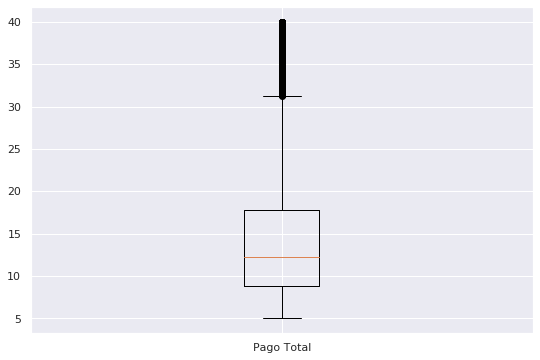

In [133]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["total_amount"])
ax.set_xticklabels(["Pago Total"])

Seleccionamos las variables a considerar en el modelo

In [134]:
datos_sample2 = datos_sample[["key","VendorID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","total_amount","hora_pickup","dayofweek","dayofmonth","month","time_duration"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"
datos_sample2["key"] = range(datos_sample2.shape[0])

/home/michael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Realizamos el grafico de correlacion de variables

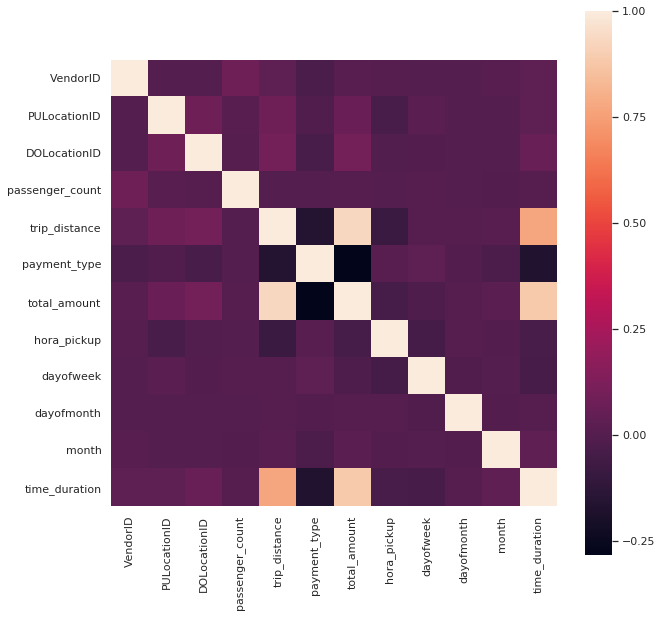

In [135]:
#correlation matrix
cols = ["VendorID","PULocationID","DOLocationID","passenger_count","trip_distance",
        "payment_type","total_amount","hora_pickup","dayofweek","dayofmonth","month",
        "time_duration"]
corrmat = datos_sample2[cols].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

Realizamos el grafico de relacion de variables viendo la distribucion de cada una de ellas

In [136]:
from random import sample
total = list(datos_sample2["key"])
muestra = sample(total,round(datos_sample2.shape[0]*0.05))

In [137]:
datos_sample2 = datos_sample2.reset_index()
datos_sample2 = datos_sample2.drop("index",axis = 1)
datos_sample_corr = datos_sample2.loc[muestra]

datos_sample_corr.shape

(35382, 13)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


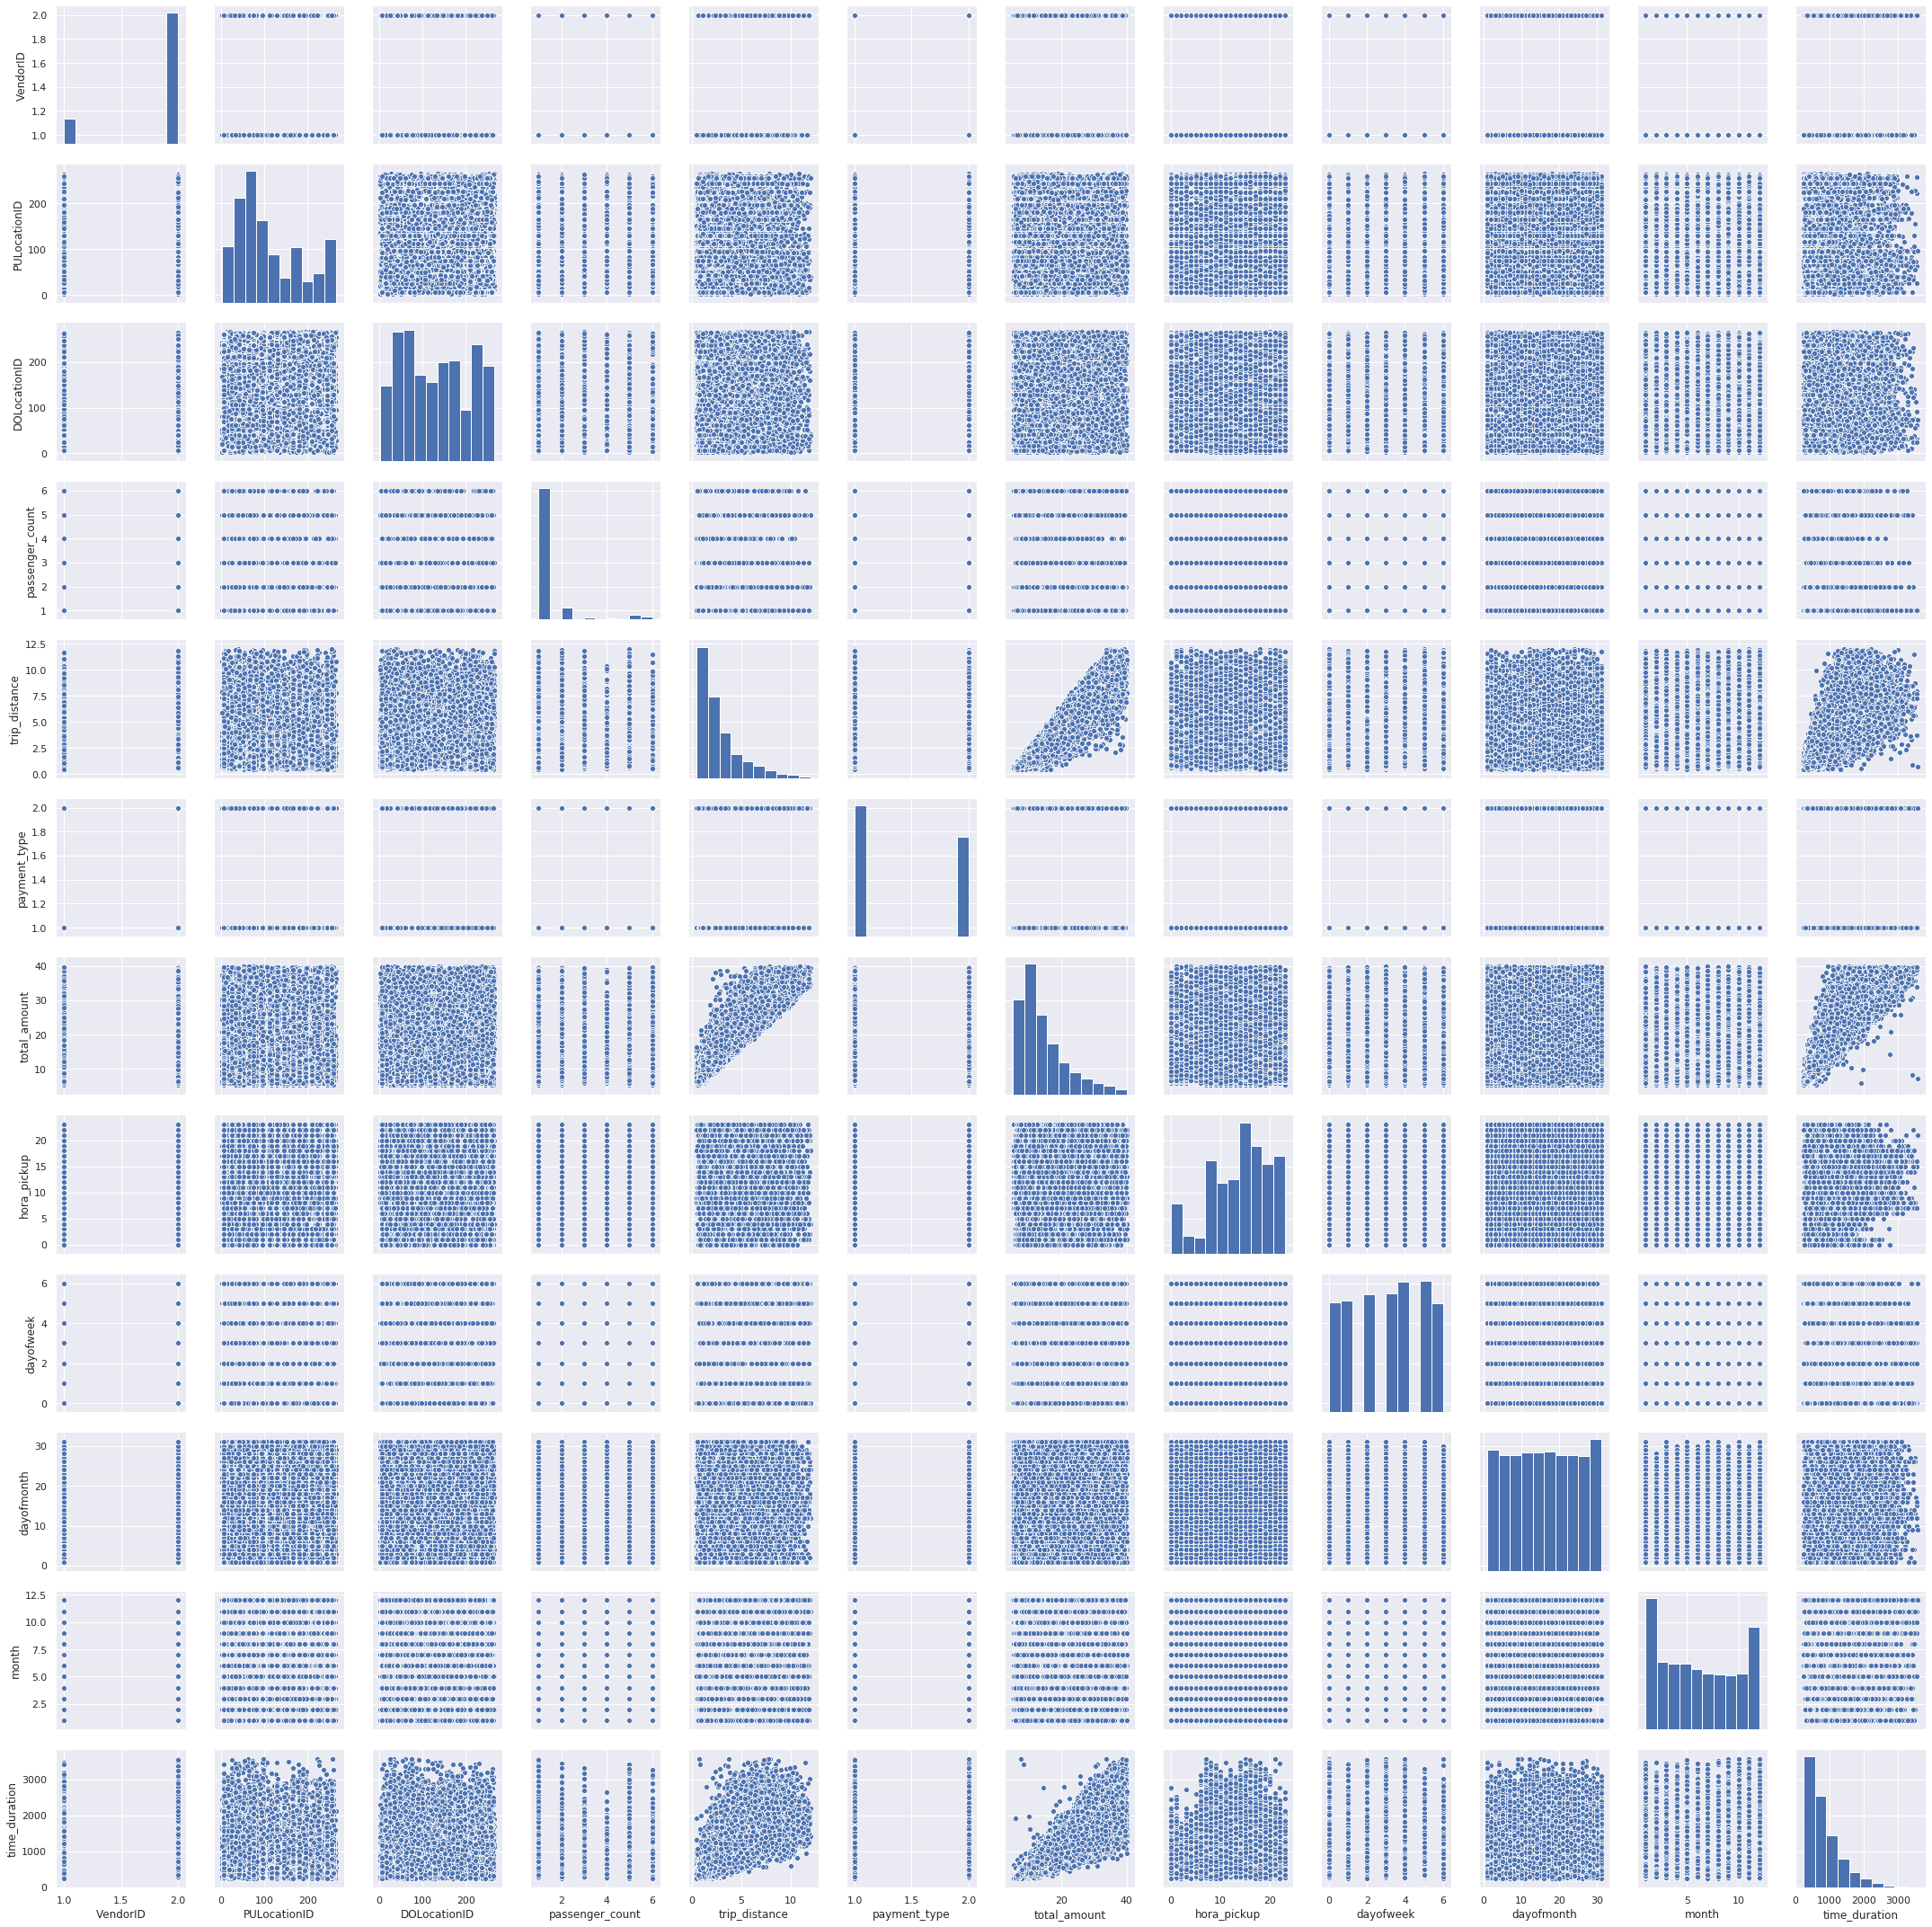

In [138]:
#scatterplot de las columnas más influyentes
sns.set()
sns.pairplot(datos_sample_corr[cols], size = 2.5)
plt.show();

Verificamos que no tengamos datos nulos

In [139]:
datos_sample2.isnull().sum()

key                0
VendorID           0
PULocationID       0
DOLocationID       0
passenger_count    0
trip_distance      0
payment_type       0
total_amount       0
hora_pickup        0
dayofweek          0
dayofmonth         0
month              0
time_duration      0
dtype: int64

Vamos a cambiar de escala a todas las variables numericas para utilizar la regresion lineal

In [140]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [141]:
X_num = datos_sample2.drop(["key","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'PULocationID', 'DOLocationID', 'passenger_count', "trip_distance", 'payment_type',
                    'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [142]:
X_scaled["key1"] = range(X_scaled.shape[0])
X = X_scaled
y = datos_sample2["time_duration"]

Particionamos los datos en train-test

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [144]:
Val_train = pd.DataFrame(X_train["key1"])
Val_test = pd.DataFrame(X_test["key1"])
X_train = X_train.drop("key1",axis = 1)
X_test = X_test.drop("key1",axis = 1)

In [145]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((353825, 10), (353825,), (353825, 10), (353825,))

Probaremos inicialmente modelos basicos como la regresion lineal y sus variantes:

**Modelo Regresion Lineal**

In [146]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()

In [147]:
mod_rl = rl.fit(X_train,y_train)

In [148]:
pred_rl = mod_rl.predict(X_test)

**Metricas**

In [149]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rl),mean_squared_error(y_test,pred_rl)**(0.5)

(111152.1107444298, 333.3948271110843)

In [150]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rl)

228.84914370572648

In [151]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rl)

30.20381609464958

Vemos que el porcentaje de error entre el time_duration y la prediccion es 30% aproximadamente. Asimismo realizaremos la correlacion pearson entre estos dos valores

In [152]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rl)

0.777133536201216

No esta mal para ser un modelo basico. Ahora probaremos las variantes de la regresion lineal utilizando modelos con penalizacion

**Modelo Lasso**

In [235]:
from sklearn.linear_model import Lasso
lasso_ = Lasso(alpha = 1)

In [236]:
mod_lasso = lasso_.fit(X_train,y_train)

In [237]:
pred_lasso = mod_lasso.predict(X_test)

**Metricas**

In [238]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lasso),mean_squared_error(y_test,pred_lasso)**(0.5)

(111175.59255618248, 333.43004147224417)

In [239]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lasso)

228.87825018190557

In [240]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lasso)

30.23167983971661

In [241]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_lasso)

0.7770821656547636

**Modelo Rigde**

In [242]:
from sklearn.linear_model import Ridge
ridge_ = Ridge(alpha = 1000)

In [243]:
mod_ridge = ridge_.fit(X_train,y_train)

In [244]:
pred_ridge = mod_ridge.predict(X_test)

**Metricas**

In [245]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_ridge),mean_squared_error(y_test,pred_ridge)**(0.5)

(111153.03579323964, 333.3962144254785)

In [246]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_ridge)

229.00624944856722

In [247]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_ridge)

30.271365587759675

In [248]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_ridge)

0.7771336130743082

Segun los resultamos de los modelos LASSO y RIDGE no mejoran los resultados, por lo que probaremos modelos de arboles ensamblados 

**Modelo GBM**

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [250]:
mod_gbm = gbm.fit(X_train,y_train)

In [251]:
pred_gbm = mod_gbm.predict(X_test)

**Metricas**

In [252]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_gbm),mean_squared_error(y_test,pred_gbm)**(0.5)

(78385.09785774903, 279.9733877670323)

In [253]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_gbm)

186.36831608334765

In [254]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_gbm)

23.233181122146547

In [255]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_gbm))

0.8493487930443924

**Modelo RandomForest**

In [256]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [257]:
mod_rf = rf.fit(X_train,y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [258]:
pred_rf = mod_rf.predict(X_test)

**Metricas**

In [259]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rf),mean_squared_error(y_test,pred_rf)**(0.5)

(74708.89626181824, 273.3292817497208)

In [260]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

182.7290223933677

In [261]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

22.857059731059476

In [262]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_rf))

0.8574418271873447

Observamos que los arboles ensamblados GBM y RANDOMFOREST obtienen mejores resultados. Finalmente probaremos el algoritmo lightgbm tuneando sus hyperparametros

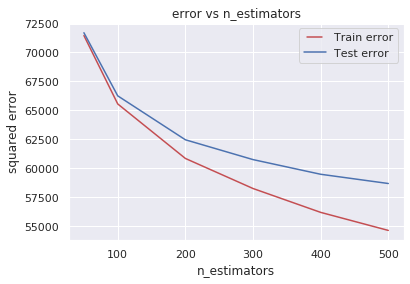

In [263]:
from lightgbm import LGBMRegressor

n_estimators = [50,100,200,300,400,500]

train_result = []
test_result = []
for estimator in n_estimators:
    lgbm = LGBMRegressor(n_estimators=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_result, "r", label="Train error")
line2, = plt.plot(n_estimators, test_result, "b", label="Test error")
plt.title('error vs n_estimators')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("n_estimators")
plt.show()

In [264]:
train_result,test_result

([71461.35905415693,
  65557.18132816245,
  60853.985785251534,
  58259.25992825244,
  56199.47322732276,
  54641.71051200128],
 [71702.30099507337,
  66255.67518254353,
  62465.01898151369,
  60754.587025280045,
  59487.986486154296,
  58690.40761622287])

In [265]:
np.array(train_result)-np.array(test_result)

array([ -240.94194092,  -698.49385438, -1611.03319626, -2495.32709703,
       -3288.51325883, -4048.69710422])

Vemos que conforme aumenta el numero de arboles el error en el entranamiento y test disminuye cada vez mas, sin embargo la diferencia de error entre ambos train y test aumenta generando overfiting, debido a ello tenemos que cortar el numero de arboles por lo que nos quedaremos con 300 arboles.

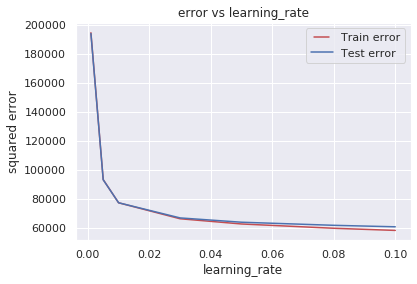

In [267]:
learn_rate_ = [0.001,0.005,0.01,0.03,0.05,0.08,0.1]

train_result = []
test_result = []
for estimator in learn_rate_:
    lgbm = LGBMRegressor(n_estimators=300,learning_rate=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learn_rate_, train_result, "r", label="Train error")
line2, = plt.plot(learn_rate_, test_result, "b", label="Test error")
plt.title('error vs learning_rate')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('learning_rate')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("learning_rate")
plt.show()

In [268]:
train_result,test_result

([194615.42644113256,
  93305.3073969842,
  77313.20084395484,
  66293.3430479196,
  62696.555402446254,
  59736.75528637427,
  58259.25992825244],
 [194065.2788029034,
  93175.2488151899,
  77336.89710829934,
  66887.47753881142,
  63907.75632967049,
  61783.986839132296,
  60754.587025280045])

In [269]:
np.array(train_result)-np.array(test_result)

array([  550.14763823,   130.05858179,   -23.69626434,  -594.13449089,
       -1211.20092722, -2047.23155276, -2495.32709703])

De igual manera vemos que el error en train y test disminuye conforme aumenta el valor de pasos del modelo y en este caso la diferencia entre ambos no aumenta en este parametro por lo que nos quedaremos con el valor maximo 0.1

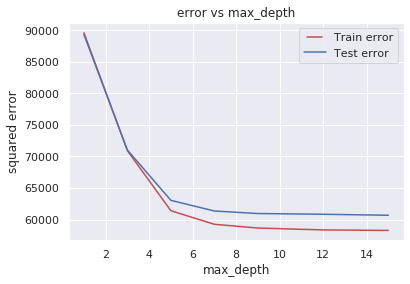

In [270]:
max_depth_ = [1,3,5,7,9,12,15]

train_result = []
test_result = []
for estimator in max_depth_:
    lgbm = LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depth_, train_result, "r", label="Train error")
line2, = plt.plot(max_depth_, test_result, "b", label="Test error")
plt.title('error vs max_depth')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('max_depth')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("max_depth")
plt.show()

In [271]:
train_result,test_result

([89591.5397652834,
  70904.49502343599,
  61394.82122658595,
  59244.66400176803,
  58654.38306945557,
  58356.1282591097,
  58276.4629629367],
 [89315.47213185353,
  71008.99581386425,
  63042.7154437591,
  61350.5460048271,
  60952.49531637655,
  60834.33298785039,
  60677.76506862113])

In [272]:
np.array(train_result)-np.array(test_result)

array([  276.06763343,  -104.50079043, -1647.89421717, -2105.88200306,
       -2298.11224692, -2478.20472874, -2401.30210568])

De igual manera vemos que el error en train y test disminuye conforme aumenta el valor de profundidad de los arboles sin embargo la diferencia de error entre ambos train y test aumenta generando overfiting, consideraremos el valor 15 ya que la diferencia no sobrepasa la del primer parametro que tuneamos antes.

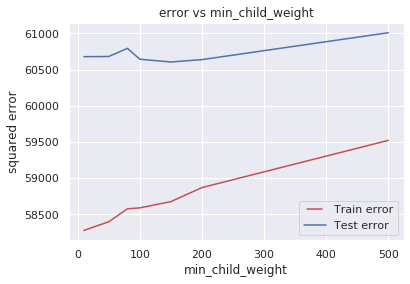

In [273]:
min_child_ = [10,50,80,100,150,200,500]

train_result = []
test_result = []
for estimator in min_child_:
    lgbm = LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=15,min_child_weight=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_child_, train_result, "r", label="Train error")
line2, = plt.plot(min_child_, test_result, "b", label="Test error")
plt.title('error vs min_child_weight')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('min_child_weight')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("min_child_weight")
plt.show()

In [274]:
train_result,test_result

([58276.4629629367,
  58396.146574890285,
  58575.29167673025,
  58588.175207830915,
  58674.49609512312,
  58868.430710383174,
  59520.97066319512],
 [60677.76506862113,
  60680.36597689482,
  60792.76996732701,
  60642.10537739148,
  60604.662517438715,
  60637.13057786976,
  61008.484717044674])

In [275]:
np.array(train_result)-np.array(test_result)

array([-2401.30210568, -2284.219402  , -2217.4782906 , -2053.93016956,
       -1930.16642232, -1768.69986749, -1487.51405385])

En este caso vemos que conforme aumenta el minimo valor registros de cada nodo de los arboles aumenta el error tanto en test y train por lo que nos quedaremos con el valor de 10.

**Finalmente ejecutamos el modelo final con los parametros tuneados:**

In [277]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(n_estimators = 300,learning_rate = 0.1,max_depth = 15,min_child_weight = 10)
mod_lightgbm = lightgbm.fit(X_train,y_train)

In [278]:
pred_lightgbm = mod_lightgbm.predict(X_test)

**Metricas**

In [279]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lightgbm),mean_squared_error(y_test,pred_lightgbm)**(0.5)

(60677.76506862113, 246.32857136073585)

In [280]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lightgbm)

163.2641640192678

In [281]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lightgbm)

20.333708977932456

In [282]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_lightgbm))

0.8854544852566446

Finalmente observamos que el modelo lightgbm con los parametros tuneados mejora incluso a los GBM y RANDOMFOREST, por lo que nos quedaremos con este modelo

**Observamos la importancia de variables**

In [283]:
importance = pd.DataFrame(mod_lightgbm.feature_importances_, index=X_train.columns).reset_index()
importance.columns = ["importance_var","value"]
importance = importance.sort_values("value",ascending = True)

Text(0.5, 1.0, 'Importancia de Variables')

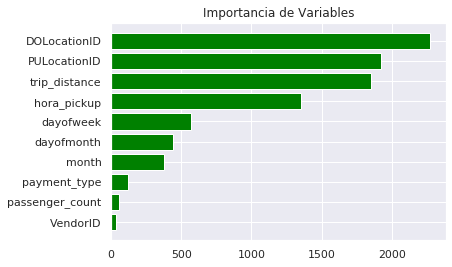

In [284]:
fig, ax = plt.subplots()

ax.barh(importance["importance_var"],importance["value"],align='center',color='green')
ax.set_title('Importancia de Variables')

In [285]:
importance.sort_values("value",ascending = False)

,importance_var,value
2,DOLocationID,2269
1,PULocationID,1919
4,trip_distance,1854
6,hora_pickup,1350
7,dayofweek,568
8,dayofmonth,445
9,month,379
5,payment_type,122
3,passenger_count,60
0,VendorID,34


De acuerdo al grafico vemos que las principales variables son el inicio del recorrido, la distancia de viaje, el final del recorrido y la hora en la que toma el viaje

**Revisando predicciones**

In [286]:
Val_train.columns = ["key"]
Val_test.columns = ["key"]

datos_sample_train = datos_sample2.merge(Val_train)
datos_sample_test = datos_sample2.merge(Val_test)

In [287]:
datos_sample_train.shape,datos_sample_test.shape

((353825, 13), (353825, 13))

In [288]:
Val_test["key1"] = range(Val_test.shape[0])
prediccion = pd.DataFrame(pred_lightgbm)
prediccion["key1"] = range(prediccion.shape[0])

prediccion = prediccion.merge(Val_test)
prediccion = prediccion.drop("key1",axis = 1)
prediccion.columns = ["pred_time_duration","key"]
datos_sample_test = datos_sample_test.merge(prediccion)

Verificaremos la calidad de las predicciones

In [289]:
datos_sample_test["range_dif"] = np.abs(datos_sample_test["time_duration"] - datos_sample_test["pred_time_duration"])
datos_sample_test["perc_dif"] = datos_sample_test["range_dif"] / datos_sample_test["time_duration"]

In [304]:
percentile = pd.DataFrame(datos_sample_test["range_dif"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.95, 1]))
percentile

,range_dif
0.00,0.000527
0.10,18.873522
0.20,37.967869
0.30,57.834485
0.40,79.654525
0.50,105.001794
0.60,136.756686
0.70,179.977847
0.80,247.299757
0.95,517.023660


Esta tabla muestra segun el porcentaje de los datos cuantos segundos falla el modelo, es decir en el 70% de los datos el error aproximado es de +-3 minutos (179.97 segundos)

In [302]:
percentile = pd.DataFrame(datos_sample_test["perc_dif"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.95, 1]))
percentile

,perc_dif
0.00,0.000001
0.10,0.029192
0.20,0.058847
0.30,0.089745
0.40,0.122697
0.50,0.158905
0.60,0.200673
0.70,0.250751
0.80,0.318075
0.95,0.542110


En esta tabla observamos que el 80% de los datos tiene un error porcentual de 32%, es decir si se tiene un tiempo de duración 100 minutos el modelo estima como maximo un error de +-32

**Sobreestimacion y Subestimacion**

In [300]:
datos_sample_test["range_dif_real"] = (datos_sample_test["pred_time_duration"] - datos_sample_test["time_duration"])
datos_sample_test["perc_dif_real"] = datos_sample_test["range_dif_real"] / datos_sample_test["time_duration"]

In [306]:
percentile = pd.DataFrame(datos_sample_test["range_dif_real"].quantile([0, 0.1, 0.15, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85, 0.9, 1]))
percentile

,range_dif_real
0.00,-3220.862271
0.10,-259.471695
0.15,-175.488691
0.30,-55.531575
0.40,-10.145611
0.50,26.069725
0.60,59.329183
0.70,95.715358
0.85,182.873865
0.90,238.821231


En esta tabla observamos que el error subestimado en 15% de los datos es menor a 3 minutos y el error sobreestimado 15% de los datos es mayor a 3 minutos 

In [307]:
percentile = pd.DataFrame(datos_sample_test["perc_dif_real"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
percentile

,perc_dif_real
0.0,-0.901445
0.1,-0.235785
0.2,-0.143086
0.3,-0.075261
0.4,-0.015477
0.5,0.043036
0.6,0.104458
0.7,0.174403
0.8,0.262275
0.9,0.397733


En esta tabla observamos que en 10% de los datos hay una subestimacion de 23% como maximo, mientras que en un 20% hay una sobreestimacion de 26% como maximo.

**Como valor agregado revisaremos las zonas que generan mayor ingreso y el tiempo_duration de esas zonas**

In [308]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [309]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [310]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [311]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [312]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [313]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [314]:
df = read_shapefile(sf)

In [315]:
df_location = datos_sample_test.groupby("PULocationID")["total_amount"].sum().reset_index()
df_location.columns = ["LocationID","total_amount"]

In [316]:
df = df.merge(df_location)


1: 14 => 123 

   1   2   3   4   5   6


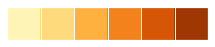

<Figure size 792x648 with 0 Axes>

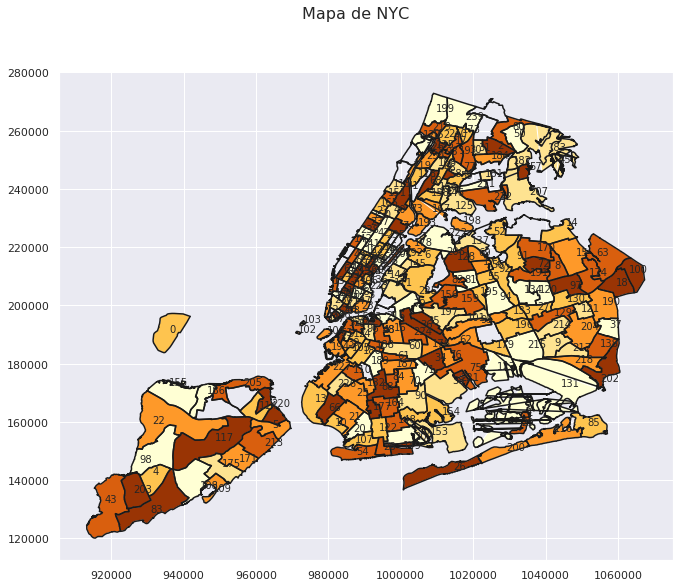

In [317]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["total_amount"])

plot_comunas_data(sf,title,names, data, 5, True)

En el grafico podemos observar que las zonas con el color mas fuerte indican las que generan mayor cantidad de ingresos

**Top 10 zonas con mas recaudacion de dinero**

In [318]:
df.sort_values("total_amount",ascending = False).head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,coords,total_amount
66,74,0.110291,0.000295,East Harlem North,74,Manhattan,"[(1002572.2760010064, 236761.57440185547), (10...",321872.98
67,75,0.087664,0.000241,East Harlem South,75,Manhattan,"[(1000577.174697876, 228028.552730456), (10012...",269192.98
34,41,0.052793,0.000143,Central Harlem,41,Manhattan,"[(998716.9128961712, 234240.39717498422), (999...",234600.94
74,82,0.119876,0.000324,Elmhurst,82,Queens,"[(1020914.1317107975, 210389.71388940513), (10...",208738.12
2,7,0.107417,0.000390,Astoria,7,Queens,"[(1010804.2179628164, 218919.64069513977), (10...",197734.45
149,166,0.068824,0.000255,Morningside Heights,166,Manhattan,"[(996131.212920785, 235950.77747422457), (9963...",189710.99
88,97,0.062476,0.000163,Fort Greene,97,Brooklyn,"[(992751.6986956745, 192765.1403606385), (9928...",151570.58
26,33,0.053270,0.000147,Brooklyn Heights,33,Brooklyn,"[(985305.7563099563, 195535.75502961874), (985...",150268.96
35,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"[(1002413.1913817227, 243934.56038284302), (10...",146974.24
221,244,0.080569,0.000360,Washington Heights South,244,Manhattan,"[(1000658.6903420687, 249440.20533962548), (10...",145387.24


**Revisando el tiempo de duracion de las 5 zonas que mas recaudan**

**1**

In [319]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 74]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,75,27364.37,8.80,7.516667,8.493083
1,236,22155.46,11.84,10.916667,11.624050
2,41,20116.85,8.16,6.933333,6.689580
3,166,18785.97,11.30,11.216667,10.696851
4,42,18608.87,9.12,8.016667,8.091315
5,263,15623.29,12.30,10.741667,11.471823
6,238,13715.65,14.80,14.666667,14.419460
7,74,11046.59,7.30,6.100000,6.350080
8,239,11030.68,16.80,16.983333,16.962969
9,244,9067.98,17.29,17.358333,17.607573


**2**

In [320]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 75]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,74,27397.57,8.30,5.916667,7.527883
1,41,12313.86,8.80,7.508333,8.070220
2,42,12064.71,11.30,10.500000,11.558509
3,236,11950.72,8.50,6.766667,7.217955
4,238,10843.05,9.96,8.333333,8.430302
5,75,10669.42,7.30,6.066667,6.283798
6,263,10549.46,8.80,7.233333,7.636700
7,237,8938.67,12.36,12.333333,12.665637
8,166,7495.54,11.34,11.083333,11.922448
9,141,6243.39,12.36,11.741667,11.967101


**3**

In [321]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 41]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,42,26619.67,8.30,6.566667,6.973060
1,74,21698.62,8.30,7.250000,7.169411
2,166,11386.29,8.16,6.716667,7.092002
3,75,10693.89,9.36,8.633333,8.956283
4,41,10051.57,7.30,5.500000,5.643254
5,116,9958.47,10.30,9.133333,10.121466
6,238,8374.95,11.00,9.700000,10.059374
7,244,8066.50,14.30,14.366667,14.656454
8,239,6422.57,12.96,12.133333,12.875194
9,151,6284.18,9.30,7.900000,8.171578


**4**

In [322]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 82]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,129,30934.52,9.30,8.533333,8.312639
1,82,20017.08,8.30,8.250000,8.189909
2,56,11901.86,9.30,9.033333,9.410969
3,138,11824.04,15.80,11.250000,13.416454
4,173,10215.83,10.30,10.716667,10.458390
5,260,9025.63,9.36,8.966667,9.219026
6,70,6854.14,13.30,11.675000,13.116171
7,226,6813.77,13.30,13.000000,13.875131
8,95,6619.43,11.76,10.800000,12.543250
9,83,6497.82,8.30,7.283333,8.031039


**5**

In [323]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 7]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,7,27050.53,7.56,5.916667,6.131310
1,223,23273.17,9.30,8.400000,8.095970
2,179,14941.51,8.30,6.750000,6.946802
3,129,12878.70,12.30,11.316667,12.196319
4,226,11644.91,9.80,8.583333,8.831863
5,260,8263.81,9.96,8.725000,9.188110
6,146,7270.90,8.30,7.050000,7.608447
7,193,6061.10,8.80,7.783333,7.928078
8,145,5420.05,12.25,11.366667,11.864000
9,82,5339.53,14.80,15.816667,15.236838
